### About Dataset:
The advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple channels like radio, tv, and newspapers. It is required to understand the impact of advertising budgets on the overall sales.

### Objective:
* Understand the Dataset & cleanup (if required).
* Build Regression models to predict the sales w.r.t a single & multiple features.
* Also evaluate the models & compare their respective scores.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing liabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
f=pd.read_csv('advertising.csv')
f.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# no. of rows and coloumns
f.shape

(200, 4)

In [5]:
# checking for null values
f.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**There are no null or missing values in data set**

In [6]:
# checking for the stats
f.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Data Standardization

In [7]:
f.columns[:-1]

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [8]:
from sklearn.preprocessing import MinMaxScaler
for col in f.columns[:-1]:
    mms=MinMaxScaler()
    f[col]=mms.fit_transform(f[[col]])

In [9]:
f.head()

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,22.1
1,0.148123,0.792339,0.394019,10.4
2,0.055800,0.925403,0.606860,12.0
3,0.509976,0.832661,0.511873,16.5
4,0.609063,0.217742,0.510994,17.9


### Data Visualization

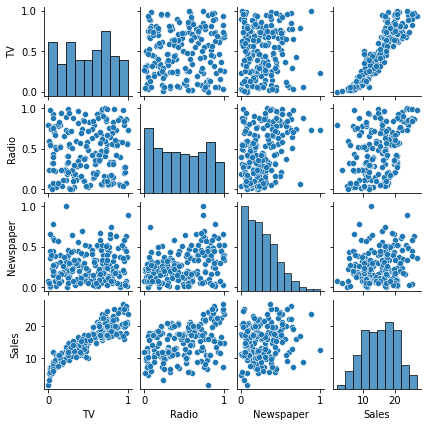

In [10]:
sns.pairplot(f,height=1.5);

**Here, TV & Salaes have linear Relationship.**

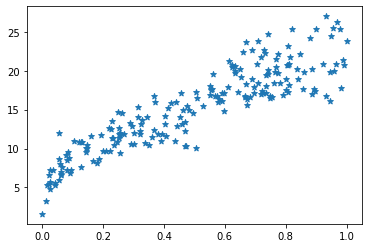

In [11]:
plt.scatter(f['TV'],f['Sales'],marker='*');

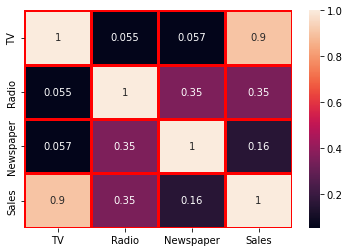

In [15]:
sns.heatmap(f.corr(),annot=True,linewidths=3,linecolor='r');

**Conclusion:**TV is highly correlated with the sales i.e,with target column

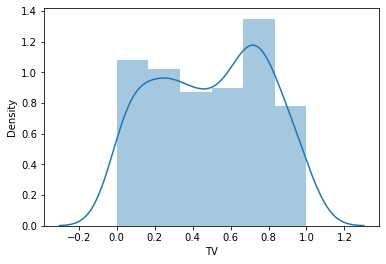

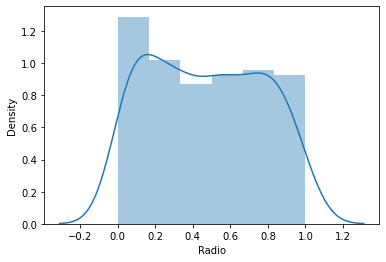

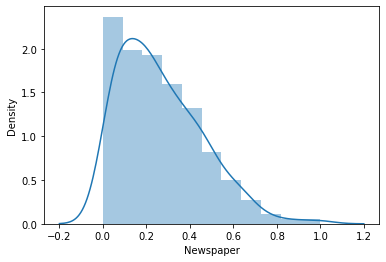

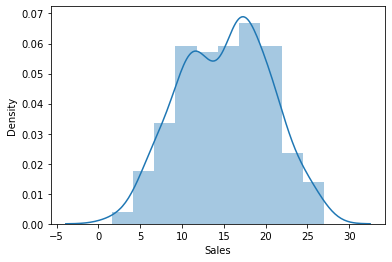

In [16]:
for col in f.columns:
    sns.distplot(f[col]);
    plt.show();

**Using distplot we found there are skewness in newspaper column**

In [17]:
#Handling the skewness
from scipy.stats import skew
print(skew(f["Newspaper"]))

0.887995975308549


In [18]:
#Removing skewness through square root method
f["Newspaper"]=np.sqrt(f["Newspaper"])
print(skew(f["Newspaper"]))

0.027808334516575314


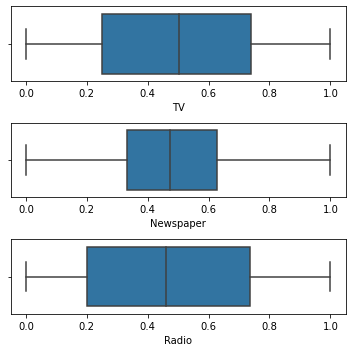

In [21]:
# Outlier Analysis by using a boxplot
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(f['TV'], ax = axs[0])
plt2 = sns.boxplot(f['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(f['Radio'], ax = axs[2])
plt.tight_layout()

**No outlier detected in the data**

## Simple Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [23]:
X=f['TV'].values.reshape(-1,1)
y=f['Sales'].values

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
y_test_pred=lr.predict(X_test)
y_train_pred=lr.predict(X_train)

In [26]:
print("train:",mean_squared_error(y_train,y_train_pred))
print("test:",mean_squared_error(y_test,y_test_pred))

train: 4.873755712925826
test: 6.639091226559299


In [27]:
r2_score(y_train,y_train_pred)

0.8134588121404831

In [28]:
r2_score(y_test,y_test_pred)

0.8010943934328407

In [29]:
#KFold for Linear
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
fold=KFold(n_splits=5,shuffle=True,random_state=0)
score_train=cross_val_score(lr,X_train,y_train,cv=fold)
score_test=cross_val_score(lr,X_test,y_test,cv=fold)

print(score_train)
print(score_test)
print()
acc_score_train=np.mean(abs(score_train))
acc_score_test=np.mean(abs(score_test))

print("acc_score_train :",acc_score_train)
print("acc_score_test :",acc_score_test)

[0.86565495 0.75970929 0.85335364 0.74095302 0.75023802]
[0.84789429 0.77911444 0.74740588 0.57422736 0.80173726]

acc_score_train : 0.7939817839456561
acc_score_test : 0.750075846710554


In [21]:
#Lasso Regulization
from sklearn.linear_model import Lasso
lso=Lasso(alpha=.1)
lso.fit(X_train,y_train)
print("lasso_train_score:",lso.score(X_train,y_train))
print("lasso_test_score:",lso.score(X_test,y_test))

lasso_train_score: 0.8087929236581252
lasso_test_score: 0.7875115637255883


In [22]:
# Ridge Regulization
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
print("Ridge_train_score:",ridge.score(X_train,y_train))
print("Ridge_test_score:",ridge.score(X_test,y_test))

Ridge_train_score: 0.8134123017942247
Ridge_test_score: 0.8001062182141365


In [23]:
#ElasticNet Regularization
from sklearn.linear_model import ElasticNet
enet=ElasticNet(alpha=.1)
enet.fit(X_train,y_train)
print("ENet_train_score:",enet.score(X_train,y_train))
print("ENet_test_score:",enet.score(X_test,y_test))

ENet_train_score: 0.681852156270061
ENet_test_score: 0.6352223664450085


In [24]:
#KFold for ridge
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold=KFold(n_splits=5,shuffle=True,random_state=0)
score_train=cross_val_score(ridge,X_train,y_train,cv=fold)
score_test=cross_val_score(ridge,X_test,y_test,cv=fold)

print(score_train)
print(score_test)
print()
acc_score_train=np.mean(abs(score_train))
acc_score_test=np.mean(abs(score_test))

print("acc_score_train :",acc_score_train)
print("acc_score_test :",acc_score_test)

[0.86464109 0.75830331 0.85394926 0.74472998 0.74930216]
[0.83312426 0.78263434 0.7362835  0.58774131 0.80728412]

acc_score_train : 0.7941851586548635
acc_score_test : 0.7494135055230574


**In simplt linear Regression we are getting the r squared value 0.8010**

**After regularization, for ridge we are getting 80.01% score**

(Here for ridge by regulization technique we are getting the 74.94% score)

In [30]:
result=pd.DataFrame({'Actual':y_test,"Predicted":y_test_pred})
result.head(5)

,Actual,Predicted
0,11.3,10.929130
1,8.4,9.883991
2,12.0,12.083137
3,25.4,22.931893
4,16.7,16.426994


### multiple Linear regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
X=f.iloc[:,:-1]
y=f.iloc[:,3]

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
lrm=LinearRegression()

In [35]:
lrm.fit(X_train,y_train)

LinearRegression()

In [36]:
y_test_pred=lrm.predict(X_test)

In [37]:
y_train_pred=lrm.predict(X_train)

In [38]:
meanAbErr = mean_absolute_error(y_test, y_test_pred)
meanSqErr = mean_squared_error(y_test, y_test_pred)
rootMeanSqErr = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.4177692712438401
Mean Square Error: 4.541071230476916
Root Mean Square Error: 2.13097893712653


In [39]:
r2_score(y_train,y_train_pred)

0.9132318325322684

In [40]:
r2_score(y_test,y_test_pred)

0.8639505774601635

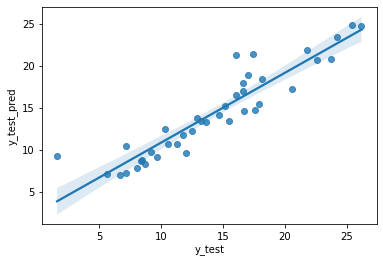

In [41]:
sns.regplot(y_test,y_test_pred);
plt.xlabel('y_test')
plt.ylabel("y_test_pred")
plt.show();

In [42]:
#KFold for multiple Linear
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold=KFold(n_splits=5,shuffle=True,random_state=0)
score_train=cross_val_score(lrm,X_train,y_train,cv=fold)
score_test=cross_val_score(lrm,X_test,y_test,cv=fold)

print(score_train)
print(score_test)
print()
acc_score_train=np.mean(abs(score_train))
acc_score_test=np.mean(abs(score_test))

print("acc_score_train :",acc_score_train)
print("acc_score_test :",acc_score_test)

[0.93976966 0.86990723 0.92257904 0.88004031 0.91443037]
[0.97170463 0.90843225 0.68142222 0.67796623 0.89450875]

acc_score_train : 0.9053453214431257
acc_score_test : 0.8268068130245296


### Lasso Regularization

In [47]:
#Lasso Regulization
from sklearn.linear_model import Lasso
lso=Lasso(alpha=.1)
lso.fit(X_train,y_train)
print("lasso_train_score:",lso.score(X_train,y_train))
print("lasso_test_score:",lso.score(X_test,y_test))

lasso_train_score: 0.9043732885745822
lasso_test_score: 0.8542676008845166


### Ridge Regularization

In [49]:
# Ridge Regulization
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=.1)
ridge.fit(X_train,y_train)
print("Ridge_train_score:",ridge.score(X_train,y_train))
print("Ridge_test_score:",ridge.score(X_test,y_test))

Ridge_train_score: 0.9131803899938702
Ridge_test_score: 0.8635346449287722


**ElasticNet Regression**

In [51]:
#ElasticNet Regularization
from sklearn.linear_model import ElasticNet
enet=ElasticNet(alpha=.1)
enet.fit(X_train,y_train)
print("ENet_train_score:",enet.score(X_train,y_train))
print("ENet_train_score:",enet.score(X_test,y_test))

ENet_train_score: 0.767982711752197
ENet_train_score: 0.702736153682512


In [41]:
#KFold for ridge
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold=KFold(n_splits=5,shuffle=True,random_state=0)
score_train=cross_val_score(ridge,X_train,y_train,cv=fold)
score_test=cross_val_score(ridge,X_test,y_test,cv=fold)

print(score_train)
print(score_test)
print()
acc_score_train=np.mean(abs(score_train))
acc_score_test=np.mean(abs(score_test))

print("acc_score_train :",acc_score_train)
print("acc_score_test :",acc_score_test)

[0.93666815 0.85591681 0.91191459 0.88097018 0.90295622]
[0.95382855 0.90520708 0.64905734 0.72119458 0.8926116 ]

acc_score_train : 0.8976851885913689
acc_score_test : 0.8243798303742065


**In Multiple linear Regression we are getting the r squared value 86.39% which is better than the simple linear regression score**

**After cross validation in Multiple linear Regression we are getting the r squared value 0.8268 which is also better than the KFold in simple linear regression score**

Here by ridge regulization we are getting the 0.8635 r2 score & after regulization for ridge we got 82.43% score.

### GridSearchCV

In [52]:
from sklearn.feature_selection import RFE #(recursive feature elimination)

In [53]:
rfe=RFE(lrm)

In [54]:
hyper_para={'n_features_to_select': list(range(1, 14))}

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
model=GridSearchCV(estimator=rfe,
                   param_grid=hyper_para,
                   scoring='r2',
                   verbose=1,cv=fold)

In [57]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid={'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12, 13]},
             scoring='r2', verbose=1)

In [58]:
model.best_estimator_

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [59]:
model.best_score_

0.9055380917630531

In [60]:
rfe_model=RFE(lrm,n_features_to_select=2)
rfe_model.fit(X_train , y_train)

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [63]:
rfe_model.score(X_train,y_train)

0.9130218535776821

In [61]:
rfe_model.score(X_test,y_test)

0.8658755781123508

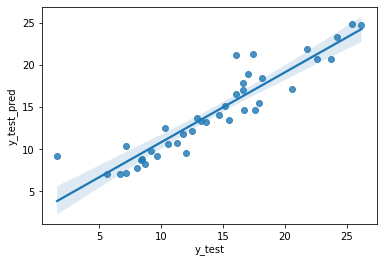

In [65]:
sns.regplot(y_test,y_test_pred);
plt.xlabel('y_test')
plt.ylabel("y_test_pred")
plt.show();

**After observing this plot we can see there is close prediction So we can say our module is good.**

In [67]:
result=pd.DataFrame({'Actual':y_test,"Predicted":y_test_pred})
result.head(5)

,Actual,Predicted
18,11.3,10.699582
170,8.4,8.677395
107,12.0,9.567616
98,25.4,24.854602
177,16.7,14.644164
